<a href="https://colab.research.google.com/github/nadsu077/Top.in.CompXIII/blob/main/Lista_4_T%C3%B3picos_Especiais_em_Computa%C3%A7%C3%A3o_XIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE***
***TÓPICOS ESPECIAIS EM COMPUTAÇÃO XIII - Lista 4***

***Docente:*** Antônio Carlos Gay Thomé

***Discentes:*** Nadson Ângelo e Rosângela D'Ávilla

In [ ]:
pip install neupy

In [ ]:
pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-py3-none-any.whl size=17088 sha256=121b9d018d89878801289cd883bf0f9d36665bd71249d250bf59ebb4666bd6fc
  Stored in directory: /root/.cache/pip/wheels/22/93/66/28200809b28a3685b5040db97cbc27ddd8b1a6372101244102
Successfully built SimpSOM


In [ ]:
# Importando ferramentas do Scikit-Learn a serem utilizados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, r2_score
from sklearn.cluster import KMeans
import SimpSOM as sps

from neupy import algorithms

# Importando demais funções a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Conjunto Iris

iris = pd.read_excel("https://github.com/nadsu077/Top.in.CompXIII/raw/main/iris-art.xlsx")

# Conjunto Diabetes

diabetes = pd.read_excel("https://github.com/nadsu077/Top.in.CompXIII/raw/main/Diabetes_Original.xlsx")

#
print("Conjuntos de dados Iris:\n",iris.describe())

print("\n\nConjunto de dados Diabetes:\n",diabetes.describe())

Conjuntos de dados Iris:
                V1          V2          V3          V4          V5
count  510.000000  510.000000  510.000000  510.000000  510.000000
mean     5.866980    3.061706    3.780078    1.194647    2.000000
std      0.829076    0.416542    1.772013    0.752948    0.817298
min      4.300000    2.000000    1.000000    0.100000    1.000000
25%      5.102500    2.802500    1.530000    0.290000    1.000000
50%      5.800000    3.000000    4.410000    1.340000    2.000000
75%      6.440000    3.317500    5.100000    1.800000    3.000000
max      7.900000    4.400000    6.900000    2.500000    3.000000


Conjunto de dados Diabetes:
          Gravidez     Glicose     Pressão  ...  Genealogia       Idade  Diagnóstico
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000   768.000000
mean     3.845052  120.894531   69.105469  ...    0.472266   33.240885     1.348958
std      3.369578   31.972618   19.355807  ...    0.332348   11.760232     0.476951
min      0.00

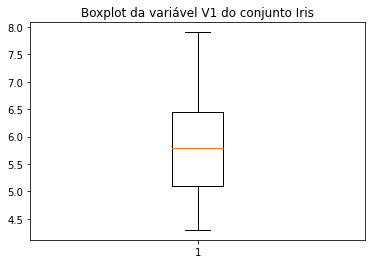

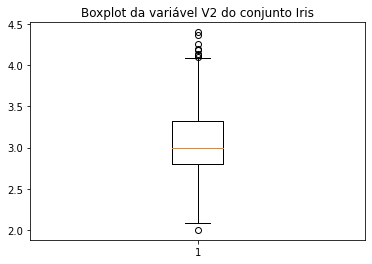

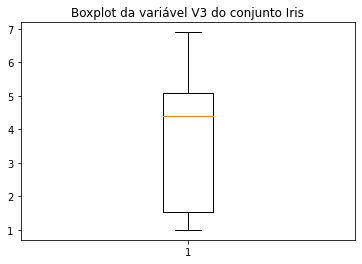

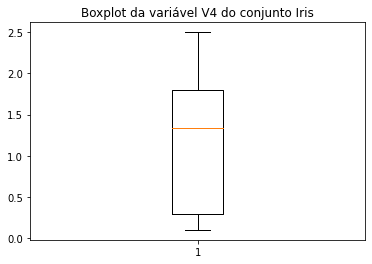

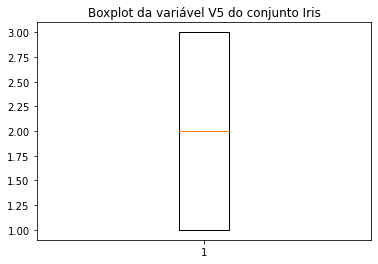

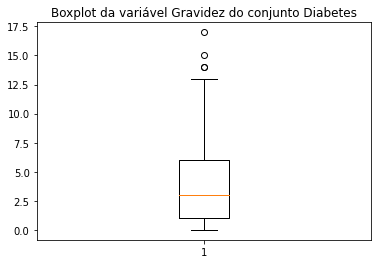

Existem  111  dados com valores iguais a zero na variável  Gravidez 




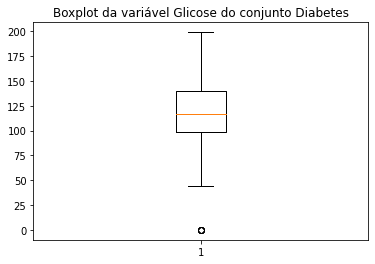

Existem  5  dados com valores iguais a zero na variável  Glicose 




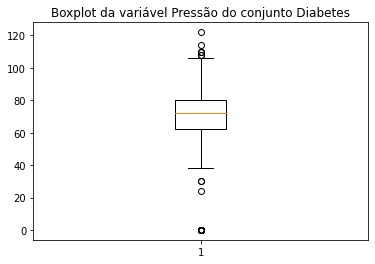

Existem  35  dados com valores iguais a zero na variável  Pressão 




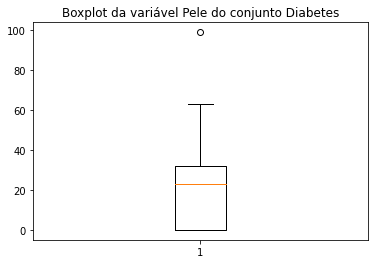

Existem  227  dados com valores iguais a zero na variável  Pele 




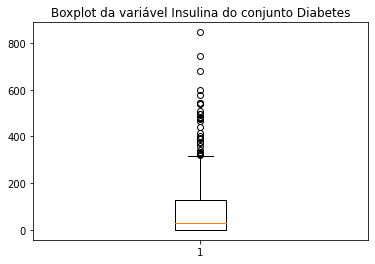

Existem  374  dados com valores iguais a zero na variável  Insulina 




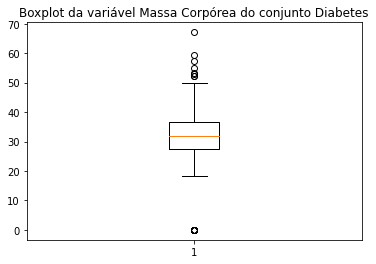

Existem  11  dados com valores iguais a zero na variável  Massa Corpórea 




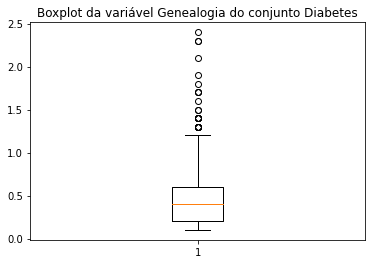

Existem  0  dados com valores iguais a zero na variável  Genealogia 




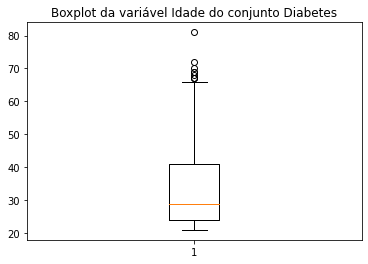

Existem  0  dados com valores iguais a zero na variável  Idade 




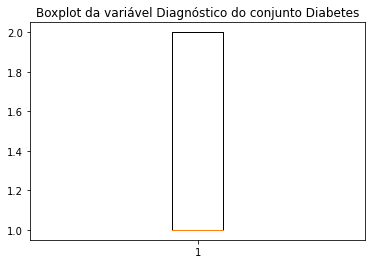

Existem  0  dados com valores iguais a zero na variável  Diagnóstico 




In [ ]:
# Boxplot das variáveis do conjunto Diabetes
for i in iris.columns :
    plt.boxplot(iris[i])
    plt.title("Boxplot da variável " + i + " do conjunto Iris")
    plt.show()

# Boxplot das variáveis do conjunto Diabetes
for i in diabetes.columns :
    plt.boxplot(diabetes[i])
    plt.title("Boxplot da variável " + i + " do conjunto Diabetes")
    plt.show()
    print("Existem ",len(diabetes.loc[diabetes[i]==0]), " dados com valores iguais a zero na variável ", i,"\n\n")



#Conjunto Iris
O box plot das variáveis do conjunto *`Iris`* não apresentam outliers que sejam destoantes do conjunto de dados de sua respectiva variável, sendo então não necessário o tratamento dessas variáveis.

#Conjunto Diabetes
O conjunto *`Diabetes`* apresenta dados não coerentes (iguais a zero) nas variáveis *`Glicose (5 ocorrências), Pressão (35 ocorrências), Pele (227 ocorrências), Insulina (374 ocorrências) e Massa Copórea (11 ocorrências)`*.
Dessa forma, conforme colocado na lista 3, nessa atividade será feito a geração artificial de dados para melhorar o conjunto diabetes.

In [ ]:
# Retirando os dados que contenham zeros nas variáveis citadas, pois o modelo de rede neural apresentou erro quadrático médio negativamente considerável
diabetes1 = diabetes[(diabetes["Glicose"] != 0) & (diabetes["Pressão"] != 0) & (diabetes["Pele"] != 0) & (diabetes["Insulina"] != 0) & (diabetes["Massa Corpórea"] != 0)]
size = len(diabetes)-len(diabetes1)
print("Dimensão de diabetes filtrado: ",diabetes1.shape,"\n\nDiferença de linhas entre o conjunto original e o filtrado: ",size)

Dimensão de diabetes filtrado:  (392, 9) 

Diferença de linhas entre o conjunto original e o filtrado:  376


In [ ]:
a = np.random.uniform(size = size)
c = np.random.binomial(n = 1, p = 0.35, size = size)+1

In [ ]:
# Geração para compor os dados que estão iguais a zero. Geração seguindo uma distribuição uniforme(0,1)
diab = pd.DataFrame(data = 
{'Gravidez': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Gravidez'] >= 0,'Gravidez'])-min(diabetes.loc[diabetes['Gravidez'] >= 0,'Gravidez']))+min(diabetes.loc[diabetes['Gravidez'] >= 0,'Gravidez']),0),
'Glicose': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Glicose'] > 0,'Glicose'])-min(diabetes.loc[diabetes['Glicose'] > 0,'Glicose']))+min(diabetes.loc[diabetes['Glicose'] > 0,'Glicose']),0),
'Pressão':np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Pressão'] > 0,'Pressão'])-min(diabetes.loc[diabetes['Pressão'] > 0,'Pressão']))+min(diabetes.loc[diabetes['Pressão'] > 0,'Pressão']),0),
'Pele': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Pele'] > 0,'Pele'])-min(diabetes.loc[diabetes['Pele'] > 0,'Pele']))+min(diabetes.loc[diabetes['Pele'] > 0,'Pele']),0),
'Insulina': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Insulina'] > 0,'Insulina'])-min(diabetes.loc[diabetes['Insulina'] > 0,'Insulina']))+min(diabetes.loc[diabetes['Insulina'] > 0,'Insulina']),0),
'Massa Corpórea': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Massa Corpórea'] > 0,'Massa Corpórea'])-min(diabetes.loc[diabetes['Massa Corpórea'] > 0,'Massa Corpórea']))+min(diabetes.loc[diabetes['Massa Corpórea'] > 0,'Massa Corpórea']),1),
'Genealogia': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Genealogia'] > 0,'Genealogia'])-min(diabetes.loc[diabetes['Genealogia'] > 0,'Genealogia']))+min(diabetes.loc[diabetes['Genealogia'] > 0,'Genealogia']),1),
'Idade': np.around(((a-min(a))/(max(a)-min(a)))*(max(diabetes.loc[diabetes['Idade'] > 0,'Idade'])-min(diabetes.loc[diabetes['Idade'] > 0,'Idade']))+min(diabetes.loc[diabetes['Idade'] > 0,'Idade']),0), 
'Diagnóstico': c})

In [ ]:
diabetes1 = diabetes1.append(diab)
diabetes1.shape

(768, 9)

In [ ]:
# Iris
Xi = iris.iloc[:,:4]
Yi = iris[iris.columns[4]]

# Normalizando o conjunto de dados Iris
Xi_norm = StandardScaler().fit_transform(Xi)


# Diabetes
Xd = diabetes1.iloc[:,:8]
Yd = diabetes1[diabetes1.columns[8]]

# Normalizando o conjunto de dados Diabetes
Xd_norm = StandardScaler().fit_transform(Xd)


In [ ]:
# PCA
PCAi = PCA(n_components=2).fit_transform(Xi_norm) # PCA do conjunto Iris
PCAd = PCA(n_components=2).fit_transform(Xd_norm) # PCA do conjunto Diabetes

In [ ]:
# Bases de Treino e Teste
# Iris
PCAi_train, PCAi_test, Yi_train, Yi_test = train_test_split(Xi_norm, Yi, test_size = 0.3)

# Bases de Treino e Teste
# Diabetes
PCAd_train, PCAd_test, Yd_train, Yd_test = train_test_split(Xd_norm, Yd, test_size = 0.3)

print("Conjunto de dados Iris:\n"
    "Dimensão dos dados de treino:\n", "Xi = ",PCAi_train.shape, "Yi = ",Yi_train.shape,
    "\nDimensão dos dados de teste:\n", "Xi = ",PCAi_test.shape, "Yi = ",Yi_test.shape,
    "\n\n\nConjunto de dados Diabetes:\n",
    "Dimensão dos dados de treino:\n", "Xd = ",PCAd_train.shape, "Yd = ",Yd_train.shape,
    "\nDimensão dos dados de teste:\n", "Xd = ",PCAd_test.shape, "Yd = ",Yd_test.shape)

Conjunto de dados Iris:
Dimensão dos dados de treino:
 Xi =  (357, 4) Yi =  (357,) 
Dimensão dos dados de teste:
 Xi =  (153, 4) Yi =  (153,) 


Conjunto de dados Diabetes:
 Dimensão dos dados de treino:
 Xd =  (537, 8) Yd =  (537,) 
Dimensão dos dados de teste:
 Xd =  (231, 8) Yd =  (231,)


#**K-Means**

In [ ]:
irisKmeans = KMeans(n_clusters=3, n_init=35).fit(Xi_norm_train)
irisKMpredito = irisKmeans.predict(Xi_norm_test)+1
irisKMpredito

array([1, 1, 2, 2, 1, 2, 2, 3, 1, 2, 3, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1,
       3, 3, 3, 1, 1, 3, 2, 2, 2, 2, 3, 1, 1, 3, 2, 3, 2, 1, 3, 1, 2, 3,
       1, 3, 2, 3, 3, 1, 2, 2, 3, 2, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 1,
       3, 1, 3, 1, 2, 3, 1, 1, 1, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 2, 2, 2,
       1, 2, 3, 1, 1, 1, 1, 3, 3, 1, 1, 2, 3, 2, 2, 2, 2, 1, 1, 1, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 2, 3, 1, 2, 2, 1, 1, 3, 2, 2, 3, 3, 1, 3, 3,
       2, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2, 2],
      dtype=int32)

In [ ]:
diabeteKmeans = KMeans(n_clusters=2, n_init=35).fit(Xd_norm_train)
diabeteKMpredito = diabeteKmeans.predict(Xd_norm_test)+1
diabeteKMpredito

array([1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Conjunto Iris

# R² do modelo
r2i = r2_score(Yi_test, irisKMpredito)

# Matriz de Confusão
cmi = confusion_matrix(Yi_test, irisKMpredito)

# Acurácia 
acci = accuracy_score(Yi_test, irisKMpredito)

# Precisão
preci = precision_score(Yi_test, irisKMpredito, average = "macro")

# Recall
reci = recall_score(Yi_test, irisKMpredito, average="macro")

print("RESULTADO DO CONJUNTO IRIS",
      "\nMatriz de Confusão = \n", cmi,
      "\nR² = ",r2i,
      "\nAcurácia = ", acci,
      "\nPrecisão = ", preci,
      "\nRecall = ", reci)

RESULTADO DO CONJUNTO IRIS 
Matriz de Confusão = 
 [[15 16 19]
 [20 18 15]
 [20 15 15]] 
R² =  -1.2200000000000002 
Acurácia =  0.3137254901960784 
Precisão =  0.31539888682745826 
Recall =  0.3132075471698113


In [ ]:
# Conjunto Diabetes

# R² do modelo
r2d = r2_score(Yd_test, diabeteKMpredito)

# Matriz de Confusão
cmd = confusion_matrix(Yd_test, diabeteKMpredito)

# Acurácia 
accd = accuracy_score(Yd_test, diabeteKMpredito)

# Precisão
precd = precision_score(Yd_test, diabeteKMpredito, average = "macro")

# Recall
recd = recall_score(Yd_test, diabeteKMpredito, average="macro")

print("RESULTADO DO CONJUNTO DIABETES",
      "\nMatriz de Confusão = \n", cmd,
      "\nR² = ",r2d,
      "\nAcurácia = ", accd,
      "\nPrecisão = ", precd,
      "\nRecall = ", recd)

RESULTADO DO CONJUNTO DIABETES 
Matriz de Confusão = 
 [[123  31]
 [ 65  12]] 
R² =  -0.8701298701298701 
Acurácia =  0.5844155844155844 
Precisão =  0.46666254329539836 
Recall =  0.4772727272727273


# Para o conjunto Iris é esperado que o algoritmo do K-means não consiga generalizar com tanta eficácia as espécies do tipo Versicolor e Virginica, pois como apurado em atividades anteriores, os dois agrupamentos apresentam semelhanças, sendo passível do algoritmo classificar alguma dessas classes de forma errônea.

# Já o conjunto Diabetes não apresentou métricas que dessem confiança, um dos possíveis problemas possa ser na quantidade de zeros encontrados em variáveis importantes, como Insulina e Glicose. É possível melhorar os resultados com outros métodos para gerar os dados de forma coesa ao conjunto.

#**ART**

Para o algoritmo do ART no python só foi encontrado a biblioteca neupy, porém ele só tem o ART1 e ao realizar o trabalho ele informava que só consegue trabalhar com matrizes binárias (e.g. matrizes com valores 0 ou 1 em cada A(i,j) da matriz). Foi tentado utilizar o pacote RSNNS da linguagem R por meio do pacote *`rpy2`*, porém sem sucesso na conversão dos objetos já criados. Dessa forma, a sugestão seria utilizar o R para realizar o trabalho analisando o K-means, ART e SOM.

#**SOM**

In [ ]:
# Conjunto iris
SOM_i = sps.somNet(15, 15, PCAi_train, PBC = True)
SOM_i.train(0.001, 5000)

# Conjunto diabetes
SOM_d = sps.somNet(15, 15, PCAd_train, PBC = True)
SOM_i.train(0.001, 5000)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Periodic Boundary Conditions active.
The weights will be initialised randomly.


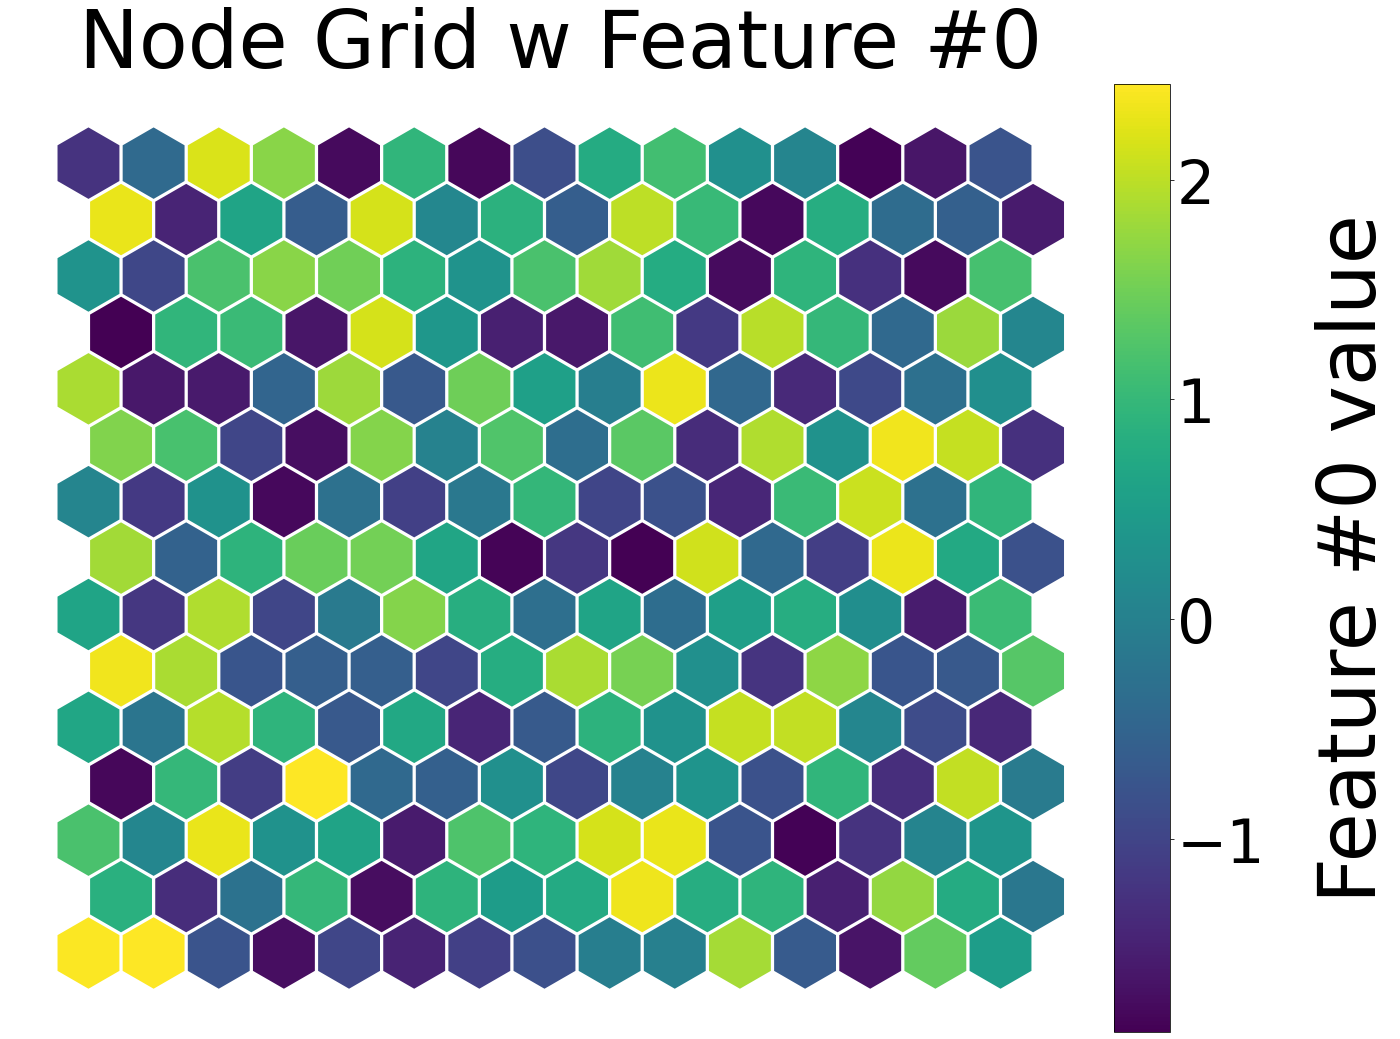

In [ ]:
SOM_i.nodes_graph(colnum=0)

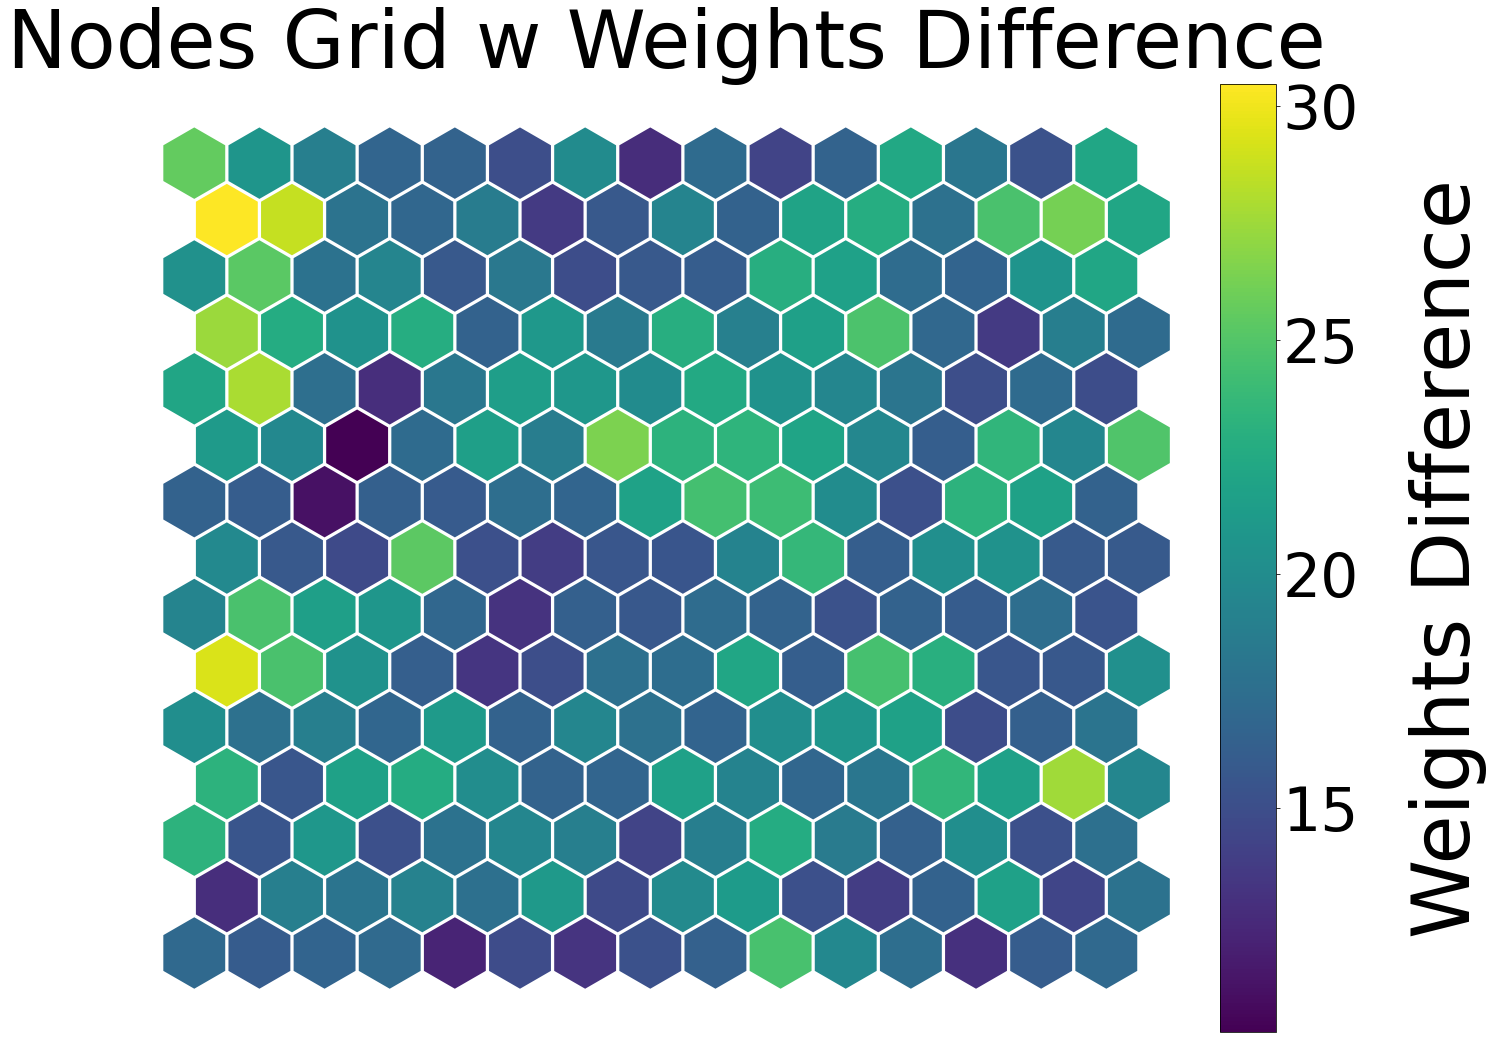

In [ ]:
SOM_i.diff_graph()

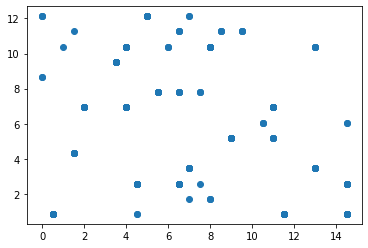

In [ ]:
prji = np.array(SOM_i.project(pd.DataFrame(PCAi_train).values))

plt.scatter(prji.T[0], prji.T[1])
plt.show()

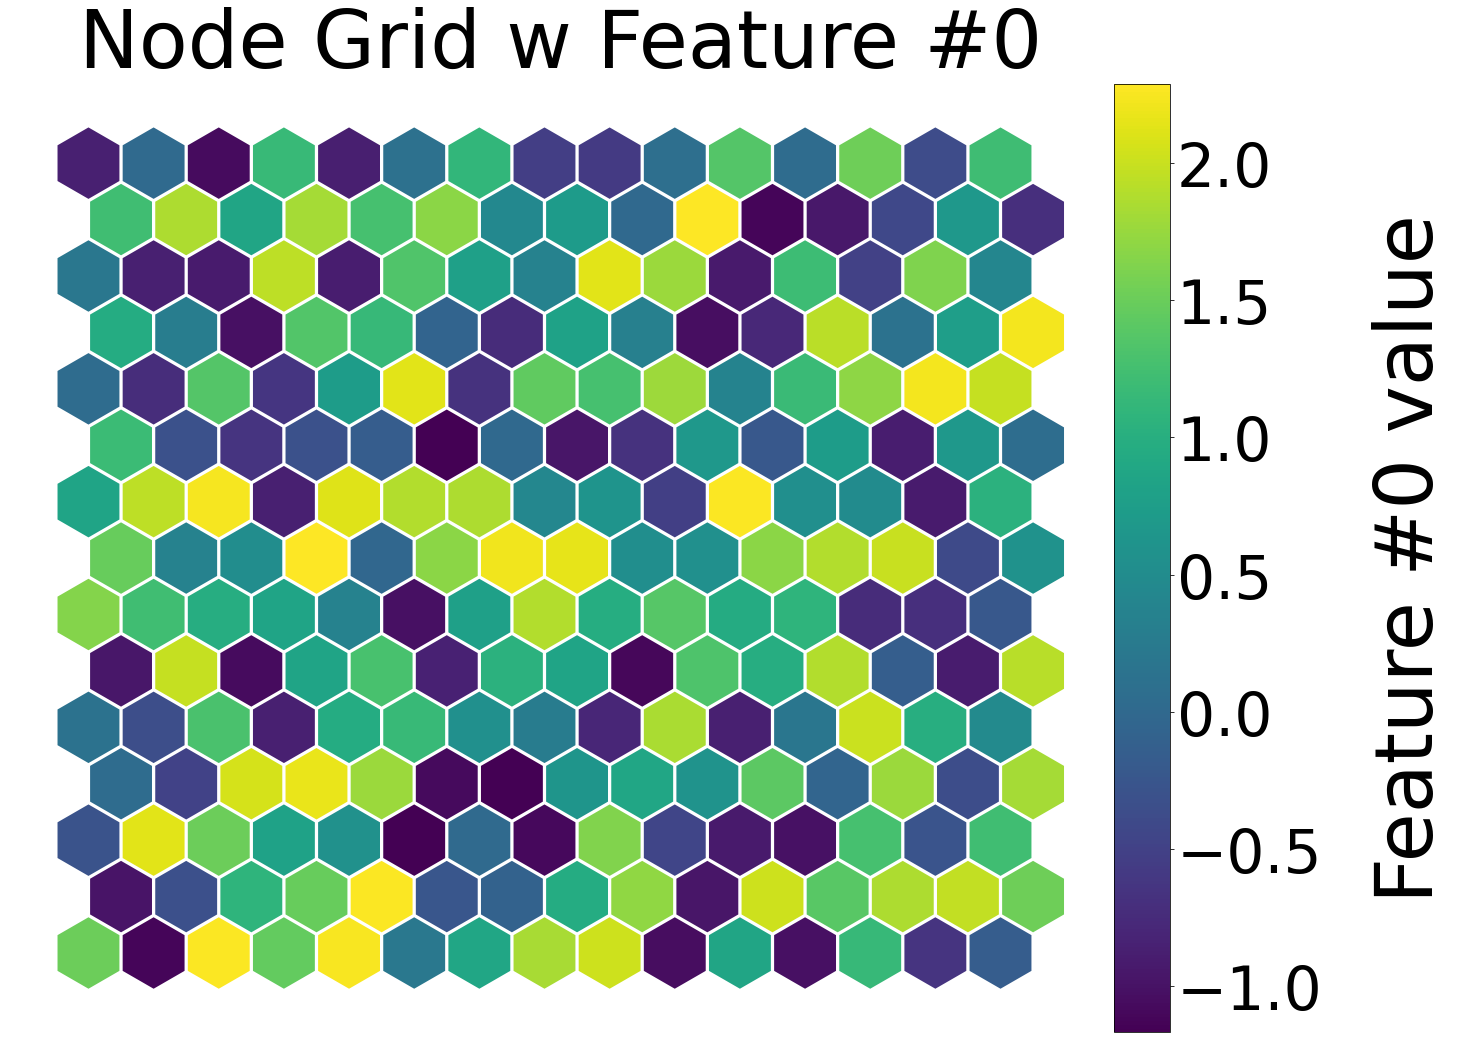

In [ ]:
SOM_d.nodes_graph(colnum=0)

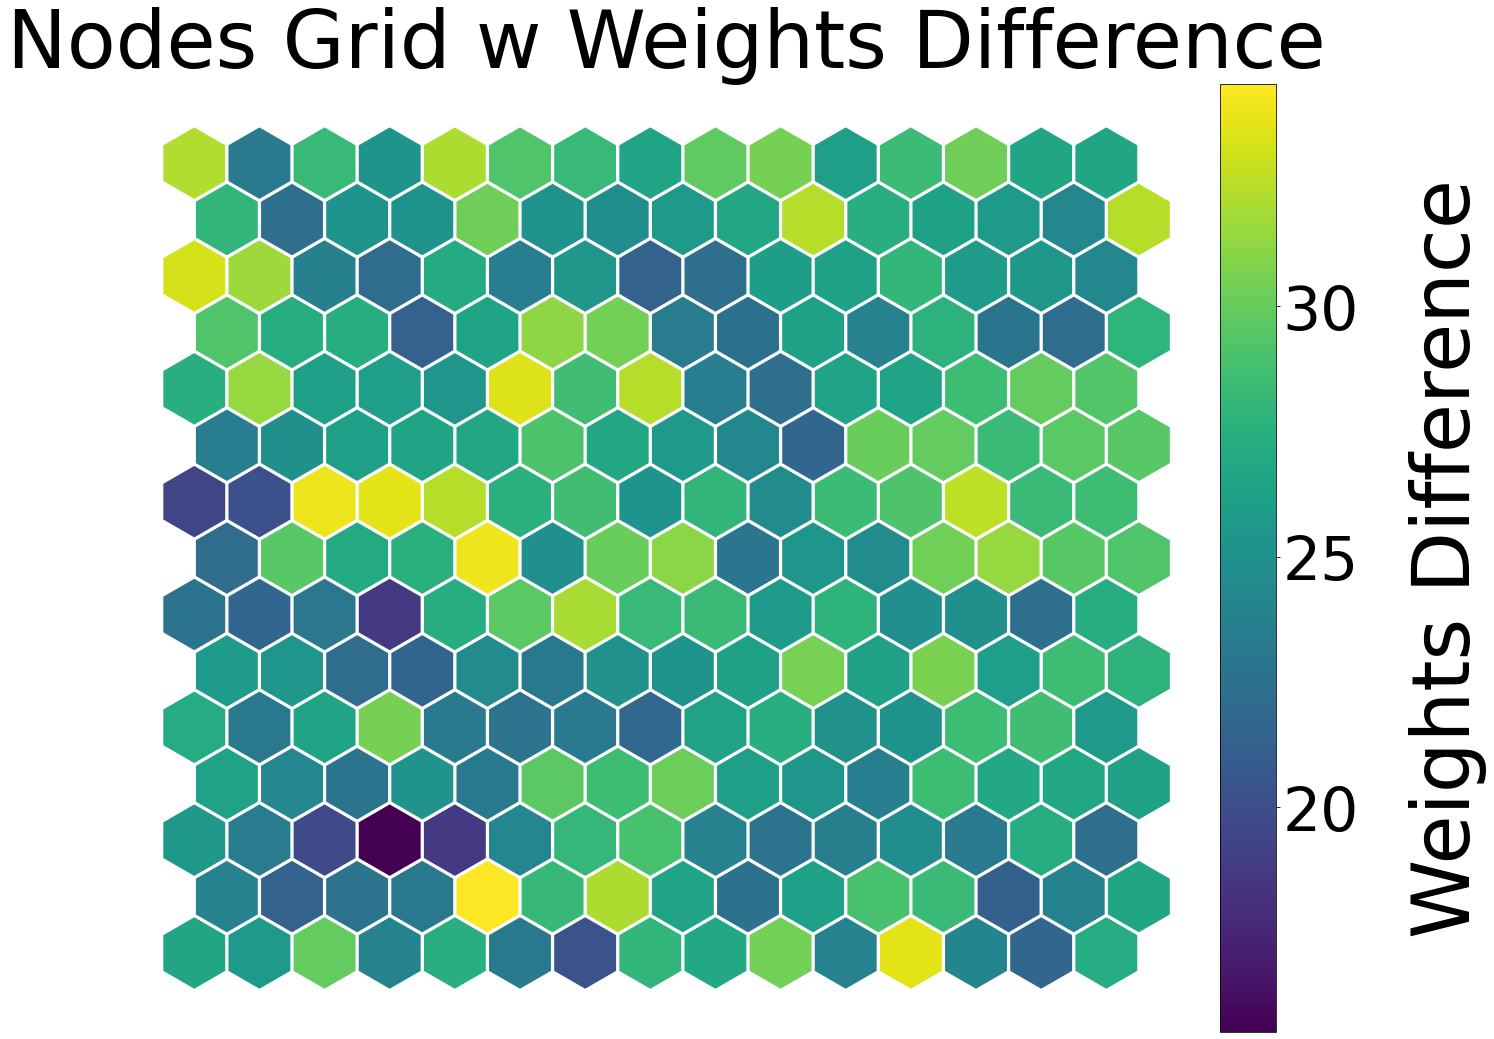

In [ ]:
SOM_d.diff_graph()

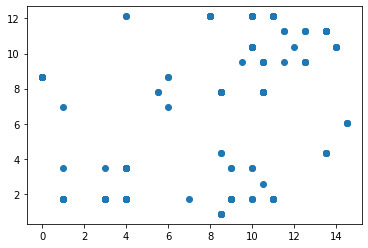

In [ ]:
prjd = np.array(SOM_d.project(pd.DataFrame(PCAd_train).values))

plt.scatter(prjd.T[0], prjd.T[1])
plt.show()